In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import io

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving depression_anxiety_data.csv to depression_anxiety_data (1).csv


In [ ]:
df = pd.read_csv('depression_anxiety_data.csv')

In [ ]:
df.shape

(783, 19)

In [ ]:
df.head(10)

,id,school_year,age,gender,bmi,who_bmi,phq_score,depression_severity,depressiveness,suicidal,depression_diagnosis,depression_treatment,gad_score,anxiety_severity,anxiousness,anxiety_diagnosis,anxiety_treatment,epworth_score,sleepiness
0,1,1,19,male,33.333333,Class I Obesity,9,Mild,False,False,False,False,11,Moderate,True,False,False,7.0,False
1,2,1,18,male,19.841270,Normal,8,Mild,False,False,False,False,5,Mild,False,False,False,14.0,True
2,3,1,19,male,25.102391,Overweight,8,Mild,False,False,False,False,6,Mild,False,False,False,6.0,False
3,4,1,18,female,23.738662,Normal,19,Moderately severe,True,True,False,False,15,Severe,True,False,False,11.0,True
4,5,1,18,male,25.617284,Overweight,6,Mild,False,False,False,False,14,Moderate,True,False,False,3.0,False
5,6,1,18,male,22.129740,Normal,3,None-minimal,False,False,False,False,2,None-minimal,False,False,False,2.0,False
6,7,1,18,male,22.408787,Normal,6,Mild,False,False,False,False,4,None-minimal,False,False,False,3.0,False
7,8,1,19,male,20.482476,Normal,4,None-minimal,False,False,False,False,9,Mild,False,False,False,5.0,False
8,9,1,20,male,21.227888,Normal,11,Moderate,True,False,False,False,8,Mild,False,False,False,7.0,False
9,10,1,19,male,24.489796,Normal,6,Mild,False,False,False,False,4,None-minimal,False,False,False,9.0,False


In [ ]:
df.columns

Index(['id', 'school_year', 'age', 'gender', 'bmi', 'who_bmi', 'phq_score',
       'depression_severity', 'depressiveness', 'suicidal',
       'depression_diagnosis', 'depression_treatment', 'gad_score',
       'anxiety_severity', 'anxiousness', 'anxiety_diagnosis',
       'anxiety_treatment', 'epworth_score', 'sleepiness'],
      dtype='object')

In [ ]:
df.drop(['id', 'school_year'],axis=1,inplace=True)

In [ ]:
df.isna().sum()

age                     0
gender                  0
bmi                     0
who_bmi                 0
phq_score               0
depression_severity     4
depressiveness          3
suicidal                1
depression_diagnosis    1
depression_treatment    4
gad_score               0
anxiety_severity        0
anxiousness             6
anxiety_diagnosis       4
anxiety_treatment       2
epworth_score           8
sleepiness              8
dtype: int64

In [ ]:
Null_columns = ['depression_severity', 'depressiveness', 'suicidal', 'depression_diagnosis', 'depression_treatment', 'anxiousness', 'anxiety_diagnosis', 'anxiety_treatment', 'epworth_score', 'sleepiness']
for col in Null_columns:
  df[col].fillna(df[col].mode()[0],inplace=True)

In [ ]:
df.isna().sum()

age                     0
gender                  0
bmi                     0
who_bmi                 0
phq_score               0
depression_severity     0
depressiveness          0
suicidal                0
depression_diagnosis    0
depression_treatment    0
gad_score               0
anxiety_severity        0
anxiousness             0
anxiety_diagnosis       0
anxiety_treatment       0
epworth_score           0
sleepiness              0
dtype: int64

In [ ]:
df.dtypes

age                       int64
gender                   object
bmi                     float64
who_bmi                  object
phq_score                 int64
depression_severity      object
depressiveness             bool
suicidal                   bool
depression_diagnosis       bool
depression_treatment       bool
gad_score                 int64
anxiety_severity         object
anxiousness                bool
anxiety_diagnosis          bool
anxiety_treatment          bool
epworth_score           float64
sleepiness                 bool
dtype: object

In [ ]:
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()

# List of columns to encode
columns_to_encode = ['gender',  'who_bmi',
       'depression_severity', 'depressiveness', 'suicidal',
       'depression_diagnosis', 'depression_treatment',
       'anxiety_severity', 'anxiousness', 'anxiety_diagnosis',
       'anxiety_treatment',  'sleepiness']

# Apply LabelEncoder to each column
for col in columns_to_encode:
    df[col] = labelencoder.fit_transform(df[col])

In [ ]:
df.dtypes

age                       int64
gender                    int64
bmi                     float64
who_bmi                   int64
phq_score                 int64
depression_severity       int64
depressiveness            int64
suicidal                  int64
depression_diagnosis      int64
depression_treatment      int64
gad_score                 int64
anxiety_severity          int64
anxiousness               int64
anxiety_diagnosis         int64
anxiety_treatment         int64
epworth_score           float64
sleepiness                int64
dtype: object

In [ ]:
df.head(10)

,age,gender,bmi,who_bmi,phq_score,depression_severity,depressiveness,suicidal,depression_diagnosis,depression_treatment,gad_score,anxiety_severity,anxiousness,anxiety_diagnosis,anxiety_treatment,epworth_score,sleepiness
0,19,1,33.333333,0,9,0,0,0,0,0,11,2,1,0,0,7.0,0
1,18,1,19.841270,3,8,0,0,0,0,0,5,1,0,0,0,14.0,1
2,19,1,25.102391,5,8,0,0,0,0,0,6,1,0,0,0,6.0,0
3,18,0,23.738662,3,19,2,1,1,0,0,15,4,1,0,0,11.0,1
4,18,1,25.617284,5,6,0,0,0,0,0,14,2,1,0,0,3.0,0
5,18,1,22.129740,3,3,3,0,0,0,0,2,3,0,0,0,2.0,0
6,18,1,22.408787,3,6,0,0,0,0,0,4,3,0,0,0,3.0,0
7,19,1,20.482476,3,4,3,0,0,0,0,9,1,0,0,0,5.0,0
8,20,1,21.227888,3,11,1,1,0,0,0,8,1,0,0,0,7.0,0
9,19,1,24.489796,3,6,0,0,0,0,0,4,3,0,0,0,9.0,0


In [ ]:
df['result'] = df['depression_diagnosis'].astype(str)  + ' ' +  df['anxiety_diagnosis'].astype(str)

In [ ]:
df.columns

Index(['age', 'gender', 'bmi', 'who_bmi', 'phq_score', 'depression_severity',
       'depressiveness', 'suicidal', 'depression_diagnosis',
       'depression_treatment', 'gad_score', 'anxiety_severity', 'anxiousness',
       'anxiety_diagnosis', 'anxiety_treatment', 'epworth_score', 'sleepiness',
       'result'],
      dtype='object')

In [ ]:
df.head(5)

,age,gender,bmi,who_bmi,phq_score,depression_severity,depressiveness,suicidal,depression_diagnosis,depression_treatment,gad_score,anxiety_severity,anxiousness,anxiety_diagnosis,anxiety_treatment,epworth_score,sleepiness,result
0,19,1,33.333333,0,9,0,0,0,0,0,11,2,1,0,0,7.0,0,0 0
1,18,1,19.841270,3,8,0,0,0,0,0,5,1,0,0,0,14.0,1,0 0
2,19,1,25.102391,5,8,0,0,0,0,0,6,1,0,0,0,6.0,0,0 0
3,18,0,23.738662,3,19,2,1,1,0,0,15,4,1,0,0,11.0,1,0 0
4,18,1,25.617284,5,6,0,0,0,0,0,14,2,1,0,0,3.0,0,0 0


In [ ]:
df['result'].unique()

array(['0 0', '0 1', '1 1', '1 0'], dtype=object)

In [ ]:
featurs=[ 'age', 'gender', 'bmi', 'who_bmi', 'phq_score',
       'depression_severity', 'depressiveness', 'suicidal',
       'depression_treatment', 'gad_score',
       'anxiety_severity', 'anxiousness',
       'anxiety_treatment', 'epworth_score', 'sleepiness']

In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, train_size = 0.75)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
%matplotlib inline

In [ ]:
X_train = train[featurs]
Y_train = train['result']

X_test = test[featurs]
Y_test = test['result']

In [ ]:
model = RandomForestClassifier(n_estimators = 150,random_state=80,max_depth=4)
model.fit(X_train, Y_train)

RandomForestClassifier(max_depth=4, n_estimators=150, random_state=80)

In [ ]:
model.score(X_test, Y_test)


0.9132653061224489

In [ ]:

Y_pred = model.predict(X_test)
print(Y_pred)

['0 0' '0 0' '0 0' '0 0' '0 0' '0 0' '0 0' '0 0' '0 0' '0 0' '0 0' '0 0'
 '0 0' '0 0' '0 0' '0 0' '0 0' '0 0' '0 0' '0 0' '0 0' '0 0' '0 0' '0 0'
 '1 1' '0 0' '0 0' '0 0' '0 0' '0 0' '0 0' '0 0' '0 0' '1 1' '0 0' '0 0'
 '0 0' '0 0' '0 0' '0 0' '0 0' '0 0' '0 0' '0 0' '0 0' '0 0' '0 0' '0 0'
 '0 0' '0 0' '1 1' '0 0' '0 0' '1 1' '1 1' '0 0' '0 0' '0 0' '0 0' '0 0'
 '0 0' '0 0' '0 0' '0 0' '0 0' '0 0' '0 0' '0 0' '0 0' '0 0' '0 0' '0 0'
 '0 0' '0 0' '0 0' '0 0' '0 0' '0 0' '0 0' '0 0' '0 0' '0 0' '0 0' '0 0'
 '1 1' '0 0' '0 0' '0 0' '0 0' '0 0' '0 0' '0 0' '0 0' '0 0' '0 0' '0 0'
 '0 0' '0 0' '0 0' '0 0' '0 0' '0 0' '0 0' '0 0' '0 0' '0 0' '0 0' '0 0'
 '1 1' '0 0' '0 0' '0 0' '0 0' '0 0' '0 0' '0 0' '0 0' '0 0' '0 0' '0 0'
 '0 0' '0 0' '0 0' '0 0' '0 0' '0 0' '0 0' '0 0' '0 0' '0 0' '0 0' '0 0'
 '0 0' '0 0' '0 0' '0 0' '0 0' '0 0' '0 0' '0 0' '0 0' '0 0' '0 0' '0 0'
 '0 0' '0 0' '0 0' '0 0' '0 0' '0 0' '0 0' '0 0' '0 0' '0 0' '0 0' '0 0'
 '0 0' '0 0' '0 0' '0 0' '0 0' '0 0' '0 0' '0 0' '0

In [ ]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

         0 0       0.92      0.99      0.96       173
         0 1       0.00      0.00      0.00         6
         1 0       0.00      0.00      0.00         9
         1 1       0.78      0.88      0.82         8

    accuracy                           0.91       196
   macro avg       0.42      0.47      0.44       196
weighted avg       0.84      0.91      0.88       196



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
cm = confusion_matrix(Y_test, Y_pred)

Text(33.22222222222222, 0.5, 'real')

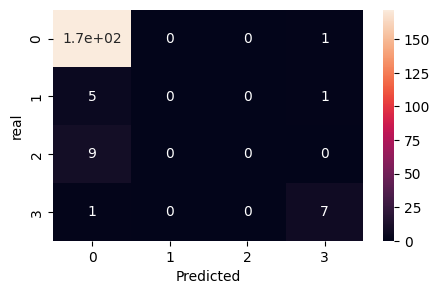

In [ ]:
plt.figure(figsize =(5,3))
sns.heatmap(cm, annot = True)
plt.xlabel('Predicted')
plt.ylabel('real')

In [ ]:
score = accuracy_score(Y_test, Y_pred)*100
acc = round(score, 2)
inac = round(100-acc,2)
corr = (score*len(test))/100
print('Accuracy: ',acc, '%, ', corr, 'correct detections')
print('Inaccuracy: ',inac, '%, ', len(test)-corr, 'Incorrect detections')

Accuracy:  91.33 %,  179.0 correct detections
Inaccuracy:  8.67 %,  17.0 Incorrect detections


In [ ]:
df.loc[3]

age                            18
gender                          0
bmi                     23.738662
who_bmi                         3
phq_score                      19
depression_severity             2
depressiveness                  1
suicidal                        1
depression_diagnosis            0
depression_treatment            0
gad_score                      15
anxiety_severity                4
anxiousness                     1
anxiety_diagnosis               0
anxiety_treatment               0
epworth_score                11.0
sleepiness                      1
result                        0 0
Name: 3, dtype: object

In [ ]:
input_data=(18,0,23.738662,3,19,2,1,1,0,15,4,1,0,11.0,1)
input_data_as_np_array = np.asarray(input_data)
input_data_reshaped = input_data_as_np_array.reshape(1,-1)
prediction = model.predict(input_data_reshaped)
print(prediction)

if prediction==['1 1']:
  print('Both Depression and Anxiety Predicted ')
elif prediction==['1 0']:
  print('Depression Predicted')
elif prediction ==['0 1']:
  print('Anxiety Predicted')
else:
  print('No Depression or Anxiety Predicted')

['0 0']
No Depression or Anxiety Predicted


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
import pickle

In [ ]:
filename = 'depession_anxiety_data.sav'
pickle.dump(model, open(filename, 'wb'))